# Ridge Regressioin (Gradient Descent)

## Import Modules

In [1]:
import pandas as pd
import numpy as np
from ridge_func import predict_output
from ridge_func import ridge_regression_gradient_descent
from matplotlib import pyplot as plt
%matplotlib inline

## Import Data type for CSV Files

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 
              'sqft_living15':float, 'grade':int, 'yr_renovated':int, 
              'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 
              'sqft_lot15':float, 'sqft_living':float, 'floors':str, 
              'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 
              'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

## Load Data from CSV Files

In [3]:
sales = pd.read_csv("kc_house_data.csv", dtype = dtype_dict)
train_data = pd.read_csv("kc_house_train_data.csv", dtype = dtype_dict)
test_data = pd.read_csv("kc_house_test_data.csv", dtype = dtype_dict)

In [4]:
# constant padding for regression
sales['constant'] = 1
train_data['constant'] = 1
test_data['constant'] = 1

## Import Useful Functions from previous work

In [5]:
def predict_output(feature_matrix, weights):
    # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    # create the predictions vector by using np.dot()
    predictions = np.dot(feature_matrix, weights)
    return predictions

## Compute the Derivative

We are now going to move to computing the derivative of the regression cost function. Recall that the cost function is the sum over the data points of the squared difference between an observed output and a predicted output, plus the L2 penalty term.

cost(w)
= SUM[ (prediction - output)^2 ]+ L2_penalty\*(w[0]^2 + w[1]^2 + ... + w[k]^2)

Since the derivative of a sum is the sum of the derivatives, we can take the derivative of the first part (the RSS) as we did in the notebook for the unregularized case in previous work and add the derivative of the regularization part. As we saw, the derivative of the RSS with respect to w[i] can be written as:

2\*SUM[ error\*[feature_i] ].

The derivative of the regularization term with respect to w[i] is:

2\*l2_penalty\*w[i].

Summing both, we get

2\*SUM[ error\*[feature_i] ] + 2\*l2_penalty\*w[i].

That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself, plus 2\*L2_penalty\*w[i].

**We will not regularize the constant.** Thus, in the case of the constant, the derivative is just twice the sum of the errors (without the 2\*L2_penalty\*w[0] term).

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors, plus 2\*l2_penalty\*w[i].

With this in mind complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points). To decide when to we are dealing with the constant (so we don't regularize it) we added the extra parameter to the call `feature_is_constant` which you should set to True when computing the derivative of the constant and False otherwise.

In [6]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    # if feature_is_constant is True, derivative is twice the dot product of errors and feature
    if feature_is_constant == True:
        derivative = 2*np.dot(errors,feature)
    # otherwise, derivative is twice the dot product plus 2*l2_penalty*weight
    else:
        derivative = 2*np.dot(errors,feature) + 2*(l2_penalty*weight)
    return derivative

## Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.

The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. Unlike in Week 2, this time we will set a **maximum number of iterations** and take gradient steps until we reach this maximum number. If no maximum number is supplied, the maximum should be set 100 by default. (Use default parameter values in Python.)

With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent, we update the weight for each feature before computing our stopping criteria.

In [7]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations = 100):
    weights = np.array(initial_weights)
    # while not reached maximum number of iterations:
    while max_iterations > 0:
        # compute the predictions based on feature_matrix and wieights using predict_output() function
        predictions = predict_output(feature_matrix,weights)
        # compute the errors as predictions - output
        errors = predictions - output
        for i in range(len(weights)):
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            #(Remember: when i=0, you are computing the derivative of the constant!)
            if i == 0:
                feature_is_constant = True
            else:
                feature_is_constant = False
            derivative = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, feature_is_constant)
            weights[i] = weights[i] - (step_size * derivative)
        max_iterations -= 1
    return weights 

## Visualizzing effect of L2 penalty

The L2 penalty gets its name because it causes weights to have small L2 norms than otherwise. Let's see how large weights get penalized. Let us consider a simple model with 1 feature:

In [8]:
simple_feature = ['constant','sqft_living']
simple_feature_matrix = train_data[simple_feature].as_matrix()
output = train_data['price'].as_matrix()
simple_test_feature_matrix = test_data[simple_feature].as_matrix()
test_output = test_data['price']

Let's set the parameters for our optimization:

In [9]:
initial_weights = np.array([0.,0.])
step_size = 1e-12
max_iterations = 1000

### w/o regularization

In [10]:
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix,output,initial_weights,step_size,0.0,max_iterations)
print("Weights (0 penalty): ", simple_weights_0_penalty)

Weights (0 penalty):  [ -8.55038595e-02   2.64788506e+02]


### w/ regularization

In [11]:
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix,output,initial_weights,step_size,1.0e11,max_iterations)
print("Weights (1e11 penalty): ", simple_weights_high_penalty)

Weights (1e11 penalty):  [  6.96906922  89.30826422]


Let's visualize this results:

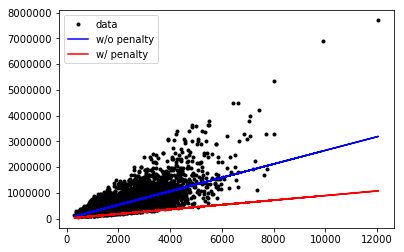

In [12]:
plt.plot(train_data['sqft_living'],output,'k.', label='data')
plt.plot(train_data['sqft_living'],predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',label='w/o penalty')
plt.plot(train_data['sqft_living'],predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-',label='w/ penalty')
plt.legend()

RSS w/ initial weight:

In [13]:
initial_predictions = predict_output(simple_test_feature_matrix, initial_weights)
initial_residuals = test_output - initial_predictions
initial_RSS = (initial_residuals **2).sum()
print("RSS w/ initial weight: %.4g" % initial_RSS)

RSS w/ initial weight: 9.279e+14


RSS w/o penalizing:

In [14]:
no_regularization_predictions = predict_output(simple_test_feature_matrix, simple_weights_0_penalty)
no_regularization_residuals = test_output - no_regularization_predictions
no_regularization_RSS = (no_regularization_residuals **2).sum()
print("RSS w/o penalizing: %.4g" % no_regularization_RSS)

RSS w/o penalizing: 1.431e+14


RSS w/ penalizing:

In [15]:
regularization_predictions = predict_output(simple_test_feature_matrix, simple_weights_high_penalty)
regularization_residuals = test_output - regularization_predictions
regularization_RSS = (regularization_residuals **2).sum()
print("RSS w/ penalizing: %.4g" % regularization_RSS)

RSS w/ penalizing: 4.859e+14


## Running a Multiple Regression with L2 Penalty

In [16]:
model_features = ['constant', 'sqft_living', 'sqft_living15']
feature_matrix = train_data[model_features].as_matrix()
output = train_data['price'].as_matrix()
test_feature_matrix = test_data[model_features].as_matrix()
test_output = test_data['price']

Let's set the parameters for our optimization:

In [17]:
initial_weights = np.array([0.,0.,0.])
step_size = 1e-12
max_iterations = 1000

### w/o regularization

In [18]:
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, 0.0, max_iterations)
print("Multiple_Weights (0 penalty): ", multiple_weights_0_penalty)

Multiple_Weights (0 penalty):  [ -2.22154863e-01   2.46527617e+02   2.03795399e+01]


### w/ regularization

In [19]:
multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, 1e11, max_iterations)
print("Multiple_Weights (High penalty): ", multiple_weights_high_penalty)

Multiple_Weights (High penalty):  [  5.32706595  70.80524334  61.63875935]


RSS w/ initial weight:

In [20]:
initial_predictions = predict_output(test_feature_matrix, initial_weights)
initial_residuals = test_output - initial_predictions
initial_RSS = (initial_residuals **2).sum()
print("RSS w/ initial weight (Multiple): %.4g" % initial_RSS)

RSS w/ initial weight (Multiple): 9.279e+14


RSS w/o penalizing:

In [21]:
no_regularization_predictions = predict_output(test_feature_matrix, multiple_weights_0_penalty)
no_regularization_residuals = test_output - no_regularization_predictions
no_regularization_RSS = (no_regularization_residuals **2).sum()
print("RSS w/o penalizing (Multiple): %.4g" % no_regularization_RSS)

RSS w/o penalizing (Multiple): 1.428e+14


RSS w/ penalizing:

In [22]:
regularization_predictions = predict_output(test_feature_matrix, multiple_weights_high_penalty)
regularization_residuals = test_output - regularization_predictions
regularization_RSS = (regularization_residuals **2).sum()
print("RSS w/ penalizing (Multiple): %.4g" % regularization_RSS)

RSS w/ penalizing (Multiple): 3.568e+14
